In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines




In [74]:
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams.update({'font.size': 8})

In [75]:
def plot_my_dist(my_distribution,plt=plt,bin_nb=50):
    plt.hist(my_distribution,bins=bin_nb);
    mean = my_distribution.mean()
    plt.axvline(mean,color='red')
    std_deviation = my_distribution.std(ddof=1)
    min_1_std = mean - std_deviation
    plus_1_std = mean + std_deviation
    plt.axvspan(min_1_std,plus_1_std,color='purple',alpha=0.3)
    mean_legend = mlines.Line2D([], [], color='red', marker=None, label='Mean')
    std_legend = mpatches.Patch(color='purple',alpha=0.3, label='1 Std dev from mean')
    plt.legend(handles=[mean_legend,std_legend])
    plt.show();

In [101]:
nb_samples = 1000
distributions =  {}
distributions["pareto"] = list()
for pareto_param in [1,2, 5,30]:
    distributions["pareto"].append(["Pareto distribution tail index %s"% pareto_param,np.random.pareto(pareto_param, nb_samples)])
distributions["poisson"] = list()
for poisson_param in [1,2,4,10]:
    distributions["poisson"].append(["Poisson with lambda=%s"% poisson_param,np.random.poisson(poisson_param, nb_samples)])

distributions["gamma"] = list()
distributions["gamma"].append(["Gamma shape 1 scale 2",np.random.gamma(1,2,nb_samples)])
distributions["gamma"].append(["Gamma shape 5 scale 1",np.random.gamma(5,1,nb_samples)])

distributions["chisquare"] = list()
for param in [1,50,100,200]:
    distributions["chisquare"].append(["ChiSquared %s"%param,np.random.chisquare(param,nb_samples)])

distributions["hypergeometric"] =list()
distributions["hypergeometric"] .append(["Hyper Geometric for 100 Good outcomes 50 Bad outcomes and 10 decision",np.random.hypergeometric(100,50,10,nb_samples)])


distributions["rayleigh"] =list()
distributions["rayleigh"].append(["Rayleigh distribution for 1 mean ",np.random.rayleigh(np.sqrt(2 / np.pi),nb_samples)])



# Pareto distributions 
For the pareto distribution, both mean and standard deviation do not represent anything meaningfull.
for this distribution, 

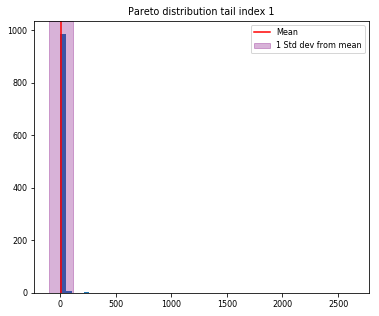

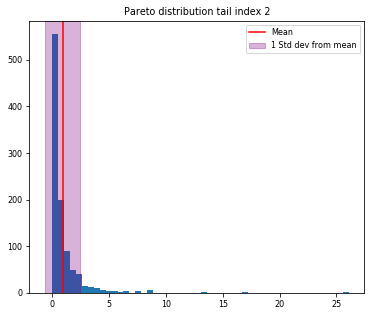

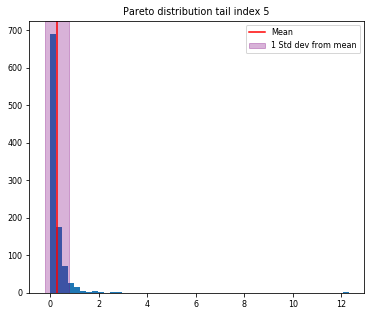

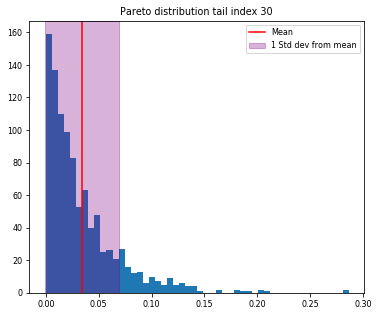

In [102]:
for dist_name,dist_var in distributions["pareto"]:
    plt.title(dist_name)
    plot_my_dist(dist_var)

In [104]:
for dist_name,dist_var in distributions["pareto"]:
    pareto_param = np.percentile(dist_var, [80] )[0]
    above = np.where(dist_var>pareto_param)[0]
    below = np.where(dist_var<=pareto_param)[0]
    print("For",dist_name)
    print("  Parameter =>",pareto_param)
    print("  Divides the sample of ",len(dist_var)," in ",len(below), " below and " ,len(above) ," above ")
    value_below = sum(dist_var[i] for i in below)/sum(dist_var)*100
    print('  Each representing respectively %i%% and %i%% of the total value.'  % (value_below,(100-value_below)))
    

For Pareto distribution tail index 1
  Parameter => 3.9909487151222187
  Divides the sample of  1000  in  800  below and  200  above 
  Each representing respectively 7% and 92% of the total value.
For Pareto distribution tail index 2
  Parameter => 1.2744496867425466
  Divides the sample of  1000  in  800  below and  200  above 
  Each representing respectively 35% and 64% of the total value.
For Pareto distribution tail index 5
  Parameter => 0.3820839927106824
  Divides the sample of  1000  in  800  below and  200  above 
  Each representing respectively 38% and 61% of the total value.
For Pareto distribution tail index 30
  Parameter => 0.05269662696536486
  Divides the sample of  1000  in  800  below and  200  above 
  Each representing respectively 46% and 53% of the total value.


For the pareto distribution mean and standard deviation do not represent anytime significant.

Pertinant criteria would be the median of the 80% percentile that allows to capture the distribution of the value.


# Poisson distribution

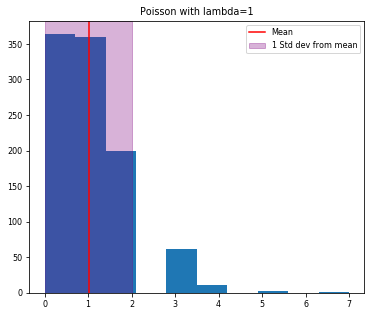

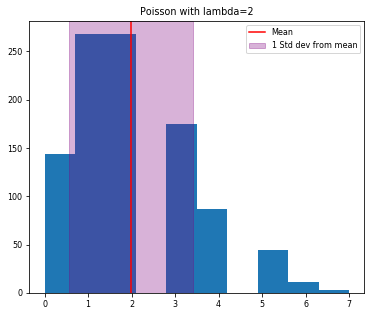

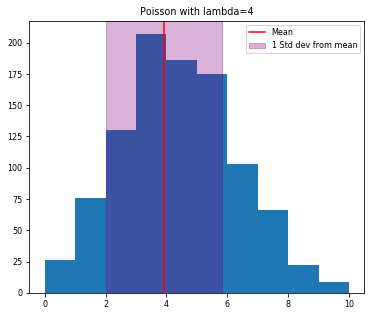

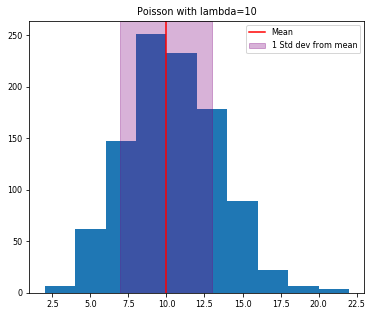

In [105]:
for dist_name,dist_var in distributions["poisson"]:
    plt.title(dist_name)
    plot_my_dist(dist_var,bin_nb=10)

For the poisson distribution, its shape gets closer to the normal distribution as the paramter increases.

The mean and standard deviation relevance is therefore linked with the its shape.

# Gamma distribution

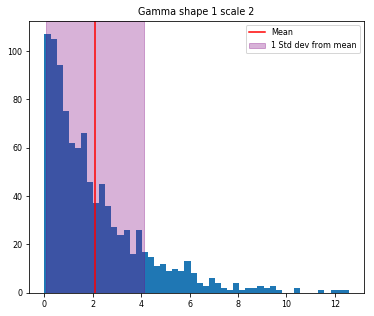

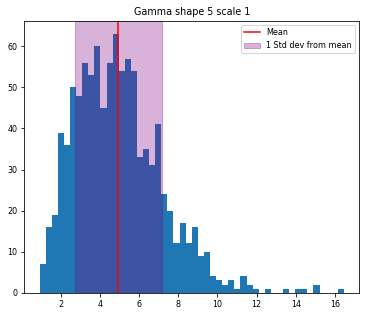

In [106]:
for dist_name,dist_var in distributions["gamma"]:
    plt.title(dist_name)
    plot_my_dist(dist_var)

For the gamma distribution, its shape gets closer to the normal distribution as the paramter increases.

The mean and standard deviation relevance is therefore linked with the its shape.

# Chi Square distribution

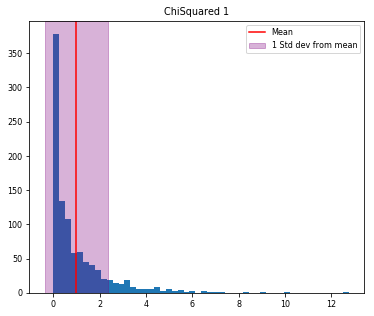

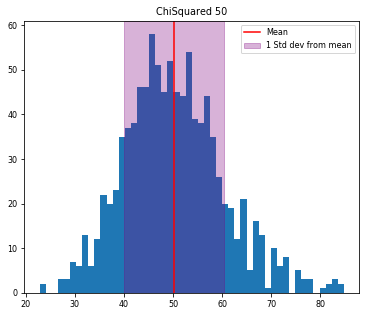

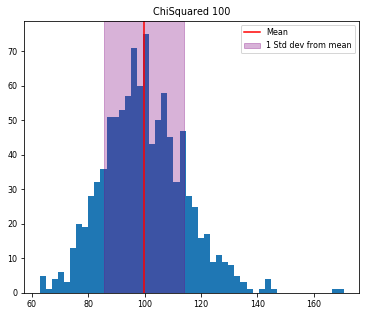

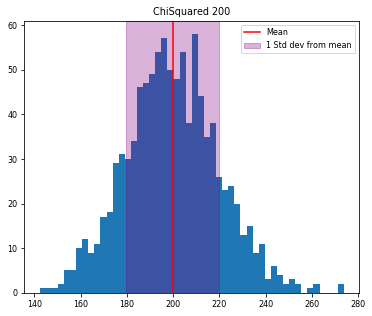

In [107]:
for dist_name,dist_var in distributions["chisquare"]:
    plt.title(dist_name)
    plot_my_dist(dist_var)

Similarly than previously, the closer the shape of the distribution is from the Normal, the more relevant is the standard deviation.

# Hypergeometric distribution

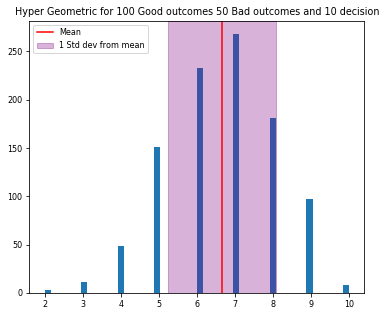

In [108]:
for dist_name,dist_var in distributions["hypergeometric"]:
    plt.title(dist_name)
    plot_my_dist(dist_var)

The distribution being close to the normal, mean and standard are relevant to descrive the distribution.

# Rayleigh distribution

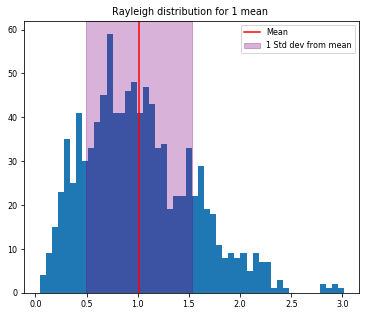

In [109]:
for dist_name,dist_var in distributions["rayleigh"]:
    plt.title(dist_name)
    plot_my_dist(dist_var)

The distribution being close to the normal, mean and standard are relevant to descrive the distribution.

# Normally distributed 

In [110]:
dist_norm_1 = np.random.normal(5,0.5,100)
dist_norm_2 = np.random.normal(10,1,100)
dist_sum = dist_norm_1 + dist_norm_2

In [ ]:
plt.axvline(dist_norm_1.std()+dist_norm_2.std()+15,color="green")
plot_my_dist(dist_sum,bin_nb=20)

We can notice that the sum of the mean matches the sum of the previous means and the the standard deviation of the sum is bigger than the biggest standard deviation but smaller than the sum of the means. (in green is the sum of the mean plus the sum of the standard deviation from the 2 previous distribution.

The number of sample make it difficult to see the shape, below in the same exercise with a much higher number of samples. We can notice the shape of the sum of the distribution is very close to the normal distribution (using transparency).

In [ ]:
nb_point = 10000
dist_norm_1 = np.random.normal(5,0.5,nb_point)
dist_norm_2 = np.random.normal(10,1,nb_point)
dist_sum = dist_norm_1 + dist_norm_2
plt.hist(np.random.normal(15,1.2,nb_point),alpha=0.3,bins=30,color="red");
plt.hist(dist_sum,alpha=0.3,bins=30,color="blue");
